RAG

Import PDF Document

In [1]:
!pip install huggingface_hub

from huggingface_hub import notebook_login

notebook_login()


In [2]:
pip install PyMuPDF

In [3]:
#pip install flash-attn --no-build-isolation   not much of use because torch.cuda.get_device_capability(0)[0] is 7(min should be 8)
#attempting to use Flash Attention 2.0 with a model not initialized on GPU.

In [4]:
!pip install bitsandbytes accelerate

In [5]:
pip install sentence-transformers

In [6]:
import os
import requests

path="/content/UnderstandingDeepLearning_11_21_24_C.pdf"

if not os.path.exists(path):
  print("[INFO] file doesnt exist , downloading using url")
  url="https://github.com/udlbook/udlbook/releases/download/v5.0.1/UnderstandingDeepLearning_03_26_25_C.pdf"
  filename=path
  response=requests.get(url)


  if response.status_code==200:
    with open(filename , "wb") as file:
      file.write(response.content)
    print(f"the file has been downloaded and saved as {filename}")
  else:
    print(f"failed to download the file . STATUS CODE:{response.status_code}")
else:
  print(f"file {path} exists.")


file /content/UnderstandingDeepLearning_11_21_24_C.pdf exists.


In [7]:
import fitz #pip install PyMuPDF
from tqdm.auto import tqdm

def text_formatter(text: str)-> str:
    """perform formatting on text"""
    cleaned_text=text.replace("\n"," ").strip()
    return cleaned_text

def open_and_read_pdf(path: str)-> list[dict]:
  doc=fitz.open(path)
  pages_and_text=[]
  for page_number, page in tqdm(enumerate(doc)):
    text=page.get_text()
    text=text_formatter(text=text)
    pages_and_text.append({"page_number":page_number,
                           "page_char_count":len(text),
                           "page_word_count":len(text.split(" ")),
                           "page_sentence_count_raw":len(text.split(". ")),
                           "page_token_count":len(text)/4,
                           "text":text})
  return pages_and_text

pages_and_text=open_and_read_pdf(path=path)
pages_and_text[ :2]

0it [00:00, ?it/s]

[{'page_number': 0,
  'page_char_count': 681,
  'page_word_count': 99,
  'page_sentence_count_raw': 7,
  'page_token_count': 170.25,
  'text': 'Understanding Deep Learning Simon J.D. Prince March 26, 2025 The most recent version of this document can be found at http://udlbook.com. Copyright in this work has been licensed exclusively to The MIT Press, https://mitpress.mit.edu, which released the final version to the public in December 2023. Inquiries regarding rights should be addressed to the MIT Press, Rights & Permissions Department. This work is subject to a Creative Commons CC-BY-NC-ND license. I would really appreciate help improving this document. No detail too small! Please contact me with suggestions, factual inaccuracies, ambiguities, questions, and errata via github or by e-mail at udlbookmail@gmail.com.'},
 {'page_number': 1,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [8]:
import random

random.sample(pages_and_text,k=3)

[{'page_number': 54,
  'page_char_count': 1417,
  'page_word_count': 234,
  'page_sentence_count_raw': 12,
  'page_token_count': 354.25,
  'text': 'Chapter 4 Deep neural networks The last chapter described shallow neural networks, which have a single hidden layer. This chapter introduces deep neural networks, which have more than one hidden layer. With ReLU activation functions, both shallow and deep networks describe piecewise linear mappings from input to output. As the number of hidden units increases, shallow neural networks improve their descriptive power. Indeed, with enough hidden units, shallow networks can describe arbitrarily complex functions in high dimensions. However, it turns out that for some functions, the required number of hidden units is impractically large. Deep networks can produce many more linear regions than shallow networks for a given number of parame- ters. Hence, from a practical standpoint, they can be used to describe a broader family of functions. 4.1 Co

In [9]:
import pandas as pd

df=pd.DataFrame(pages_and_text)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,0,681,99,7,170.25,Understanding Deep Learning Simon J.D. Prince ...
1,1,0,1,1,0.00,
2,2,230,32,1,57.50,"This book is dedicated to Blair, Calvert, Copp..."
3,3,0,1,1,0.00,
4,4,2067,758,627,516.75,Contents Preface ix Acknowledgements xi 1 Intr...


In [10]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,541.00,541.00,541.00,541.00,541.00
mean,270.00,2425.42,395.89,35.13,606.35
std,156.32,1076.75,170.12,84.77,269.19
min,0.00,0.00,1.00,1.00,0.00
25%,135.00,1660.00,282.00,14.00,415.00
50%,270.00,2246.00,369.00,19.00,561.50
75%,405.00,3080.00,489.00,27.00,770.00
max,540.00,4811.00,1271.00,1082.00,1202.75


In [11]:
from spacy.lang.en import English

nlp=English()

nlp.add_pipe("sentencizer")#adding a sentencizer pipeline

doc=nlp("this is an example text. this is splitted into sentences. this is the third sentence.")
assert len(list(doc.sents))==3

list(doc.sents)

[this is an example text.,
 this is splitted into sentences.,
 this is the third sentence.]

In [12]:
pages_and_text[234]

{'page_number': 234,
 'page_char_count': 1461,
 'page_word_count': 225,
 'page_sentence_count_raw': 12,
 'page_token_count': 365.25,
 'text': '12.6 Encoder model example: BERT 221 Figure 12.11 After pre-training, the encoder is fine-tuned using manually labeled data to solve a particular task. Usually, a linear transformation or a multi-layer perceptron (MLP) is appended to the encoder to produce whatever output is required. a) Example text classification task. In this sentiment classification task, the <cls> token embedding is used to predict the probability that the review is positive. b) Example word classification task. In this named entity recognition problem, the embedding for each word is used to predict whether the word corresponds to a person, place, or organization, or is not an entity. 12.6.2 Fine-tuning In the fine-tuning stage, the model parameters are adjusted to specialize the network to a particular task. An extra layer is appended onto the transformer network to conver

In [13]:
for item in tqdm(pages_and_text):
  item["sentences"]=list(nlp(item["text"]).sents)

  item["sentences"]=[str(sentence) for sentence in item["sentences"]]

  item["page_sentence_count_spacy"]=len(item["sentences"])

  0%|          | 0/541 [00:00<?, ?it/s]

In [14]:
random.sample(pages_and_text,k=1)

[{'page_number': 47,
  'page_char_count': 1369,
  'page_word_count': 240,
  'page_sentence_count_raw': 15,
  'page_token_count': 342.25,
  'text': '34 3 Shallow neural networks Figure 3.9 Linear regions vs. hidden units. a) Maximum possible regions as a function of the number of hidden units for five different input dimensions Di = {1, 5, 10, 50, 100}. The number of regions increases rapidly in high dimensions; with D = 500 units and input size Di = 100, there can be greater than 10107 regions (solid circle). b) The same data are plotted as a function of the number of parameters. The solid circle represents the same model as in panel (a) with D = 500 hidden units. This network has 51, 001 parameters and would be considered very small by modern standards. Figure 3.10 Number of linear regions vs. input dimensions. a) With a single input dimension, a model with one hidden unit creates one joint, which divides the axis into two linear regions. b) With two input dimensions, a model with two

In [15]:
df=pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,541.00,541.00,541.00,541.00,541.00,541.00
mean,270.00,2425.42,395.89,35.13,606.35,25.06
std,156.32,1076.75,170.12,84.77,269.19,20.11
min,0.00,0.00,1.00,1.00,0.00,0.00
25%,135.00,1660.00,282.00,14.00,415.00,13.00
50%,270.00,2246.00,369.00,19.00,561.50,19.00
75%,405.00,3080.00,489.00,27.00,770.00,28.00
max,540.00,4811.00,1271.00,1082.00,1202.75,91.00


In [16]:
num_sentence_chunk_size=10
def split_list(input_list:list[str],
               slice_size:int=num_sentence_chunk_size)->list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0,len(input_list),slice_size)]

test_list=list(range(51))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50]]

In [17]:
for item in tqdm(pages_and_text):
  item["sentence_chunks"]=split_list(input_list=item["sentences"],
                                     slice_size=num_sentence_chunk_size)
  item["num_chunks"]=len(item["sentence_chunks"])

  0%|          | 0/541 [00:00<?, ?it/s]

In [18]:
random.sample(pages_and_text,k=1)

[{'page_number': 198,
  'page_char_count': 3386,
  'page_word_count': 581,
  'page_sentence_count_raw': 34,
  'page_token_count': 846.5,
  'text': 'Notes 185 Problem 10.6∗Draw a 12×6 weight matrix in the style of figure 10.4d relating inputs x1, . . . , x6 to outputs h1, . . . , h12 in the multi-channel convolution as depicted in figures 10.5a–b. Problem 10.7∗Draw a 6×12 weight matrix in the style of figure 10.4d relating inputs h1, . . . , h12 to outputs h′ 1, . . . , h′ 6 in the multi-channel convolution in figure 10.5c. Problem 10.8 Consider a 1D convolutional network where the input has three channels. The first hidden layer is computed using a kernel size of three and has four channels. The second hidden layer is computed using a kernel size of five and has ten channels. How many biases and how many weights are needed for each of these two convolutional layers? Problem 10.9 A network consists of three 1D convolutional layers. At each layer, a zero-padded convolution with kernel si

In [19]:
df=pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,541.00,541.00,541.00,541.00,541.00,541.00,541.00
mean,270.00,2425.42,395.89,35.13,606.35,25.06,2.96
std,156.32,1076.75,170.12,84.77,269.19,20.11,2.02
min,0.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,135.00,1660.00,282.00,14.00,415.00,13.00,2.00
50%,270.00,2246.00,369.00,19.00,561.50,19.00,2.00
75%,405.00,3080.00,489.00,27.00,770.00,28.00,3.00
max,540.00,4811.00,1271.00,1082.00,1202.75,91.00,10.00


In [20]:
import re
pages_and_chunks=[]
for item in tqdm(pages_and_text):
  for sentence_chunk in item["sentence_chunks"]:
    chunk_dict={}
    chunk_dict["page_number"]=item["page_number"]

    joined_sentence_chunk="".join(sentence_chunk).replace("  "," ").strip()
    joined_sentence_chunk=re.sub(r'\.([A-Z])',r'. \1',joined_sentence_chunk)

    chunk_dict["sentence_chunk"]=joined_sentence_chunk

    chunk_dict["chunk_char_count"]=len(joined_sentence_chunk)
    chunk_dict["chunk_word_count"]=len([word for word in joined_sentence_chunk.split(" ")])
    chunk_dict["chunk_token_count"]=len(joined_sentence_chunk)/4

    pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/541 [00:00<?, ?it/s]

1600

In [21]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 218,
  'sentence_chunk': 'This helps if this multiplier is initialized to less than p 1/K, where K is the number of residual blocks. In practice, they suggest initializing this to zero. Similarly, Hayou et al. (2021) introduce Stable ResNet, which rescales the output of the function in the kth residual block (before addition to the main branch) by a constant λk. They prove that in the limit of infinite width, the expected gradient norm of the weights in the first layer is lower bounded by the sum of squares of the scalings λk. They investigate setting these to a constant p 1/K, where K is the number of residual blocks and show that it is possible to train networks with up to 1000 blocks. Zhang et al. (2019a) introduce FixUp, in which every layer is initialized using He normalization, but the last linear/convolutional layer of every residual block is set to zero. Now the initial forward pass is stable (since each residual block contributes nothing), and the gradients do

In [22]:
df=pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1600.00,1600.00,1600.00,1600.00
mean,309.85,817.51,131.94,204.38
std,161.27,433.46,75.96,108.37
min,0.00,13.00,3.00,3.25
25%,174.00,528.75,76.75,132.19
50%,321.00,750.00,119.00,187.50
75%,477.25,1107.00,182.00,276.75
max,540.00,3481.00,468.00,870.25


In [23]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,0,Understanding Deep Learning Simon J. D. Prince...,681,99,170.25
1,2,"This book is dedicated to Blair, Calvert, Copp...",230,32,57.50
2,4,Contents Preface ix Acknowledgements xi 1 Intr...,930,349,232.50
3,4,22 3 Shallow neural networks 25 3.1 Neural net...,892,316,223.00
4,4,48 4.5 Shallow vs. deep neural networks . . . ...,223,73,55.75


In [24]:
#show chunks with less than 30 tokens length
min_token_length=30
for row in df[df["chunk_token_count"]<=min_token_length].sample(5).iterrows():
  print(f'Chunk token count:{row[1]["chunk_token_count"]} | Text:{row[1]["sentence_chunk"]}')


Chunk token count:19.5 | Text:This work is subject to a Creative Commons CC-BY-NC-ND license. (C) MIT Press.
Chunk token count:12.75 | Text:Draft: please send errata to udlbookmail@gmail.com.
Chunk token count:3.25 | Text:C) MIT Press.
Chunk token count:12.75 | Text:Draft: please send errata to udlbookmail@gmail.com.
Chunk token count:19.5 | Text:This work is subject to a Creative Commons CC-BY-NC-ND license. (C) MIT Press.


In [25]:
# Filter our DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len=df[df["chunk_token_count"]>min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 0,
  'sentence_chunk': 'Understanding Deep Learning Simon J. D. Prince March 26, 2025 The most recent version of this document can be found at http://udlbook.com. Copyright in this work has been licensed exclusively to The MIT Press, https://mitpress.mit.edu, which released the final version to the public in December 2023. Inquiries regarding rights should be addressed to the MIT Press, Rights & Permissions Department. This work is subject to a Creative Commons CC-BY-NC-ND license. I would really appreciate help improving this document. No detail too small!Please contact me with suggestions, factual inaccuracies, ambiguities, questions, and errata via github or by e-mail at udlbookmail@gmail.com.',
  'chunk_char_count': 681,
  'chunk_word_count': 99,
  'chunk_token_count': 170.25},
 {'page_number': 2,
  'sentence_chunk': 'This book is dedicated to Blair, Calvert, Coppola, Ellison, Faulkner, Kerpatenko, Morris, Robinson, Sträussler, Wallace, Waymon, Wojnarowicz, and all

In [26]:
random.sample(pages_and_chunks_over_min_token_len,k=1)

[{'page_number': 256,
  'sentence_chunk': 'The table, light, and room are each described by graphs representing the adjacency of their respective components. These three graphs are themselves nodes in another graph that represents the topology of the objects in a larger model. All types of graphs can be processed using deep learning. However, this chapter focuses on undirected graphs like the social network in figure 13.2a.13.2 Graph representation In addition to the graph structure itself, information is typically associated with each node. For example, in a social network, each individual might be characterized by a fixed- length vector representing their interests. Sometimes, the edges also have information attached. For example, in the road network example, each edge might be characterized by its length, number of lanes, frequency of accidents, and speed limit. The information at a node is stored in a node embedding, and the information at an edge is stored in an edge embedding. Mo

In [27]:
from sentence_transformers import SentenceTransformer
embedding_model=SentenceTransformer(model_name_or_path="all-mpnet-base-v2",device="cpu")

sentences=["The sun dipped below the horizon, casting a warm orange glow across the sky.",
"She carefully opened the old book, its pages crackling with age and secrets."
"A sudden gust of wind sent leaves swirling through the empty street."]

embeddings=embedding_model.encode(sentences)
embedding_dict=dict(zip(sentences,embeddings))

for sentence, embedding in embedding_dict.items():
  print(f"Sentence:{sentence}")
  print(f"embedding:{embedding}")
  print("")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sentence:The sun dipped below the horizon, casting a warm orange glow across the sky.
embedding:[ 1.17035415e-02 -2.54477952e-02  1.15538007e-02 -4.97433841e-02
  1.84432343e-02 -4.76461686e-02 -2.88363788e-02  6.88379817e-03
  4.00868943e-03  8.91854707e-03 -1.39755057e-02  6.56870753e-02
  3.63647379e-02 -8.13396424e-02  2.34518554e-02 -1.24403015e-01
  1.16084376e-03 -2.86452230e-02 -8.67976770e-02  5.71497716e-03
 -1.76575538e-02 -1.85345244e-02  6.11993624e-03 -2.06604563e-02
  7.23003456e-03 -1.52283418e-03 -4.53144275e-02 -6.89937547e-03
  5.01056761e-03  5.04151769e-02 -2.09203158e-02 -2.85287220e-02
 -1.11875357e-02 -1.84627604e-02  1.72095406e-06  1.39834359e-02
 -1.79902408e-02  3.04134656e-02 -1.24035214e-04 -5.38605303e-02
  4.38567288e-02  2.25844011e-02  2.13895477e-02  1.29168322e-02
 -2.19465997e-02 -7.82676321e-03  2.67342422e-02  1.81461684e-03
 -4.27486673e-02  1.28786704e-02 -1.64909642e-02  4.92519550e-02
 -4.32733968e-02  2.11209934e-02 -6.77748099e-02 -1.1690086

In [28]:
embeddings[0].shape

(768,)

In [29]:
embedding=embedding_model.encode("my name is abhinav dayal")
embedding

array([ 3.83306257e-02,  1.39168305e-02, -1.61668155e-02,  1.73056573e-02,
        3.49462852e-02, -3.11492439e-02,  1.90516878e-02, -7.09025795e-03,
        4.01198119e-02,  3.13540883e-02,  2.89525092e-02, -4.60271798e-02,
        4.69325073e-02,  5.80842085e-02,  2.67659705e-02,  5.42767160e-03,
        7.97075126e-03, -5.07194027e-02, -1.19001782e-02, -1.58381667e-02,
       -2.66282205e-02,  8.68595485e-03, -3.26079354e-02,  2.33151875e-02,
       -3.97471003e-02,  8.50776862e-03,  4.62374650e-02, -6.49068551e-03,
        1.22676166e-02,  5.00369221e-02, -1.30130826e-02, -5.69083504e-02,
        1.81283467e-02,  4.61058356e-02,  1.71466309e-06, -1.79120861e-02,
       -1.42559763e-02,  1.01568177e-02, -6.95064217e-02, -6.10969476e-02,
       -7.04164477e-03,  2.89459936e-02,  3.93383168e-02, -1.87177882e-02,
       -2.83392128e-02,  4.46982458e-02,  2.43671313e-02,  5.01279794e-02,
        2.36181077e-03,  6.66042566e-02,  4.57067974e-03, -3.09992433e-02,
        3.77676971e-02, -

In [30]:
%%time
embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1530 [00:00<?, ?it/s]

CPU times: user 36.3 s, sys: 531 ms, total: 36.9 s
Wall time: 56 s


In [31]:
%%time
text_chunks=[item["sentence_chunk"]for item in pages_and_chunks_over_min_token_len]
text_chunks[500]

CPU times: user 320 µs, sys: 16 µs, total: 336 µs
Wall time: 340 µs


'How many parameters will it have if we place a batch normalization operation between each linear transformation and ReLU?Problem 11.7∗Consider applying an L2 regularization penalty to the weights in the convolu- tional layers in figure 11.7a, but not to the scaling parameters of the subsequent BatchNorm layers. What do you expect will happen as training proceeds?Problem 11.8 Consider a convolutional residual block that contains a batch normalization oper- ation, followed by a ReLU activation function, and then a 3×3 convolutional layer. If the input and output both have 512 channels, how many parameters are needed to define this block?Now consider a bottleneck residual block that contains three batch normalization/ReLU/convolution sequences. The first uses a 1×1 convolution to reduce the number of channels from 512 to 128. The second uses a 3×3 convolution with the same number of input and output channels. The third uses a 1×1 convolution to increase the number of channels from 128 to

In [32]:
len(text_chunks)

1530

In [33]:
%%time
#Embed in Batches
text_chunk_embeddings=embedding_model.encode(text_chunks,batch_size=32,convert_to_tensor=True)
text_chunk_embeddings

CPU times: user 26.1 s, sys: 45.4 ms, total: 26.2 s
Wall time: 25.7 s


tensor([[-0.0240,  0.0041, -0.0230,  ...,  0.0218, -0.0330, -0.0320],
        [-0.0440,  0.1286, -0.0244,  ...,  0.0262, -0.0292, -0.0530],
        [ 0.0343, -0.0264, -0.0425,  ...,  0.0255,  0.0246, -0.0180],
        ...,
        [ 0.0035,  0.0046, -0.0002,  ..., -0.0111, -0.0163, -0.0506],
        [ 0.0073,  0.0040,  0.0098,  ..., -0.0284, -0.0261, -0.0555],
        [-0.0071,  0.0328,  0.0060,  ..., -0.0201, -0.0507, -0.0621]],
       device='cuda:0')

In [34]:
pages_and_chunks_over_min_token_len[500]

{'page_number': 219,
 'sentence_chunk': 'How many parameters will it have if we place a batch normalization operation between each linear transformation and ReLU?Problem 11.7∗Consider applying an L2 regularization penalty to the weights in the convolu- tional layers in figure 11.7a, but not to the scaling parameters of the subsequent BatchNorm layers. What do you expect will happen as training proceeds?Problem 11.8 Consider a convolutional residual block that contains a batch normalization oper- ation, followed by a ReLU activation function, and then a 3×3 convolutional layer. If the input and output both have 512 channels, how many parameters are needed to define this block?Now consider a bottleneck residual block that contains three batch normalization/ReLU/convolution sequences. The first uses a 1×1 convolution to reduce the number of channels from 512 to 128. The second uses a 3×3 convolution with the same number of input and output channels. The third uses a 1×1 convolution to inc

In [35]:
#Save embeddings to file
text_chunks_and_embeddings_df=pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path="text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path,index=False)

In [36]:
#import saved file and view
text_chunks_and_embeddings_df_load=pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,Understanding Deep Learning Simon J. D. Prince...,681,99,170.25,[-2.39562895e-02 4.11595404e-03 -2.29538046e-...
1,2,"This book is dedicated to Blair, Calvert, Copp...",230,32,57.50,[-4.40348722e-02 1.28647283e-01 -2.44070757e-...
2,4,Contents Preface ix Acknowledgements xi 1 Intr...,930,349,232.50,[ 3.42660472e-02 -2.64356341e-02 -4.25007083e-...
3,4,22 3 Shallow neural networks 25 3.1 Neural net...,892,316,223.00,[-5.67083759e-03 -1.26978457e-02 -6.64234906e-...
4,4,48 4.5 Shallow vs. deep neural networks . . . ...,223,73,55.75,[-2.08878075e-03 -2.30976264e-03 -3.11980899e-...


In [37]:
import random
import torch
import numpy as np
import pandas as pd

device="cuda" if torch.cuda.is_available() else "cpu"

#import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

#change the converted embedding column from string to np.array
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

#convert our embeddings into a torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

#convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,Understanding Deep Learning Simon J. D. Prince...,681,99,170.25,"[-0.0239562895, 0.00411595404, -0.0229538046, ..."
1,2,"This book is dedicated to Blair, Calvert, Copp...",230,32,57.50,"[-0.0440348722, 0.128647283, -0.0244070757, 0...."
2,4,Contents Preface ix Acknowledgements xi 1 Intr...,930,349,232.50,"[0.0342660472, -0.0264356341, -0.0425007083, 0..."
3,4,22 3 Shallow neural networks 25 3.1 Neural net...,892,316,223.00,"[-0.00567083759, -0.0126978457, -0.00664234906..."
4,4,48 4.5 Shallow vs. deep neural networks . . . ...,223,73,55.75,"[-0.00208878075, -0.00230976264, -0.0311980899..."
...,...,...,...,...,...,...
1525,536,"Index 523 REINFORCE, 392 TRPO, 398 policy netw...",2262,321,565.50,"[0.01283642, 0.0212861188, -0.0115705337, -0.0..."
1526,537,"524 Index L2, 140 label smoothing, 149, 158 LA...",2442,341,610.50,"[0.00335607911, -0.00743826153, -0.0128065674,..."
1527,538,"Index 525 segmentation, 178 U-Net, 199 self-at...",2507,333,626.75,"[0.00346128223, 0.00456348201, -0.000248496741..."
1528,539,"526 Index total correlation VAE, 346 trace, 44...",2543,346,635.75,"[0.00734351017, 0.0040454804, 0.00984531455, 0..."


In [38]:
embeddings.shape

torch.Size([1530, 768])

In [39]:
#create model
from sentence_transformers import util, SentenceTransformer

embedding_model=SentenceTransformer(model_name_or_path="all-mpnet-base-v2",device=device)



#Define a query string.
#Turn the query string into an embedding.
#Perform a dot product or cosine similarity function between the text embeddings and the query embedding.
#Sort the results from 3 in descending order.

In [40]:
embeddings.shape

torch.Size([1530, 768])

In [41]:
# 1. Define the query
query = "inductive bias"
print(f"Query: {query}")

# 2. Embed the query
# Note: it's import to embed you query with the same model you embedding your passages
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

# 3. Get similarity scores with the dot product (use cosine similarity if outputs of model aren't normalized)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep top 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: inductive bias
[INFO] Time taken to get scores on 1530 embeddings: 0.02239 seconds.


torch.return_types.topk(
values=tensor([0.5097, 0.5076, 0.4976, 0.4959, 0.4949], device='cuda:0'),
indices=tensor([  70,  290, 1149,   68,  288], device='cuda:0'))

In [42]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [43]:
query = "inductive bias"
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'inductive bias'

Results:
Score: 0.5097
Text:
18 2 Supervised learning When we compute the prediction y from the input x, we
call this inference. The model is just a mathematical equation with a fixed
form. It represents a family of different relations between the input and the
output. The model also contains param- eters ϕ. The choice of parameters
determines the particular relation between input and output, so we should really
write: y = f[x, ϕ]. (2.2) When we talk about learning or training a model, we
mean that we attempt to find parameters ϕ that make sensible output predictions
from the input. We learn these parameters using a training dataset of I pairs of
input and output examples {xi, yi}. We aim to select parameters that map each
training input to its associated output as closely as possible. We quantify the
degree of mismatch in this mapping with the loss L. This is a scalar value that
summarizes how poorly the model predicts the training outputs from their
correspon

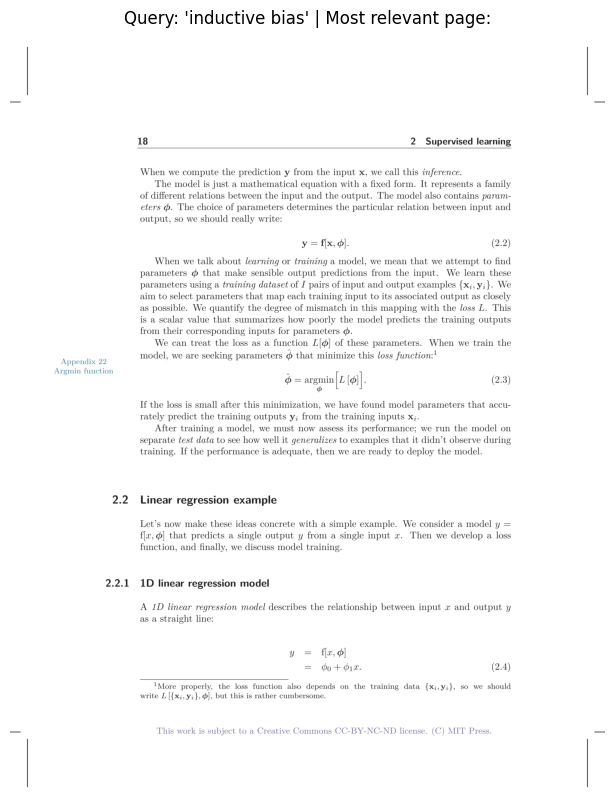

In [44]:
import fitz # pymupdf library

#open PDF and load target
pdf_path = "/content/UnderstandingDeepLearning_11_21_24_C.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(31) # note: page numbers of our PDF start 41+

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Save image (optional)
# img.save("output_filename.png")
doc.close()

# Convert the pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis("off")
plt.show()


In [45]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # Get Euclidean/L2 norm
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# Example vectors/tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [46]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Finds relevant passages given a query and prints them out along with their scores.
    """
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    # Loop through zipped together scores and indices from torch.topk
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}")
        print("\n")

In [47]:
query="increasing gradient"
# retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on (1530 embeddings: 0.00007 seconds.
Score: 0.5043
Text:
Gradient descent algorithms rely on the loss surface being relatively smooth, so
the gradients should be related before and after each update step. Adapted from
Balduzzi et al. (2017). This work is subject to a Creative Commons CC-BY-NC-ND
license. (C) MIT Press.
Page number: 201


Score: 0.4633
Text:
Instead, it will bounce back and forth around the minimum. Adaptive moment
estimation, or Adam, takes this idea and adds momentum to both the estimate of
the gradient and the squared gradient: This work is subject to a Creative
Commons CC-BY-NC-ND license. (C) MIT Press.
Page number: 101


Score: 0.4529
Text:
110 7 Gradients and initialization Figure 7.7 Weight initialization. Consider a
deep network with 50 hidden layers and Dh = 100 hidden units per layer. The
network has a 100-dimensional input x initialized from a standard normal
distribution, a single fixed target y = 0, and a least squares loss

In [48]:
#checking gpu memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [49]:
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [50]:
#A quantization config (optional) - a config on what precision to load the model in (e.g. 8bit, 4bit, etc)
#A model ID - this will tell transformers which model/tokenizer to load
#A tokenizer - this turns text into numbers ready for the LLM (note: a tokenizer is different from an embedding model)
#An LLM model - this will be what we use to generate text based on an input

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create a quantization config

from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: flash attention 2 = faster attention mechanism
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa" # scaled dot product attention
print(f"Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use
# model_id = "google/gemma-2b-it"
model_id = model_id

# 3. Instantiate tokenizer (tokenizer turns text into tokens)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use as much memory as we can
                                                 attn_implementation=attn_implementation)

if not use_quantization_config:
    llm_model.to("cuda")

Using attention implementation: sdpa


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [51]:
torch.cuda.get_device_capability(0)[0]

7

In [52]:
print(f"Using attention implementation: {attn_implementation}")

Using attention implementation: sdpa


In [53]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (norm): GemmaRMSNorm((2048,), 

In [54]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

2506172416

In [55]:
def get_model_mem_size(model: torch.nn.Module):
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate model sizes
    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012345344, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [56]:
input_text = "how transformers are better than CNN?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
how transformers are better than CNN?

Prompt (formatted):
<bos><start_of_turn>user
how transformers are better than CNN?<end_of_turn>
<start_of_turn>model



In [57]:
#Tokenize the input text and send it to the GPU
input_ids = tokenizer(prompt,
                      return_tensors="pt").to("cuda")

# Generate outputs from local LLM
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256)
print(f"Model output (tokens):\n{outputs[0]}\n")

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1139,  76581,    708,   2525,
          1178,  36583, 235336,    107,    108,    106,   2516,    108,    688,
         39857,    576, 128149,   1163,  36583, 235256,  66058,    109,    688,
        235274, 235265,  55777,  28029,  66058,    108, 235290, 128149,    798,
          2185,   4805,  26282,    576,   1423,  27104, 235269,  12879,  13042,
          1178,  36583, 235256,    674,   2185,   1423,    575,    476,  66452,
          8879, 235265,    108, 235290,   1417,  25039,   1174,    577,   6589,
          1497,  26282,    576,   1423, 235269,   1582,    685,   4158,   5255,
         10310,    591, 153958, 235275,  13333, 235269,    978,  34790, 235265,
           109,    688, 235284, 235265,   6002, 235290,   9805, 146439,  66058,
           108, 235290, 128149,    791,    573,   7374,    577,  16446,   1497,
        235290,   4201,  43634,   1865,   2167,   4942,    576,    476,  10629,
        235265,  

In [58]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
how transformers are better than CNN?<end_of_turn>
<start_of_turn>model
**Advantages of Transformers over CNNs:**

**1. Parallel Processing:**
- Transformers can process entire sequences of data simultaneously, significantly faster than CNNs that process data in a sequential manner.
- This enables them to handle long sequences of data, such as natural language processing (NLP) tasks, more efficiently.

**2. Long-Range Dependencies:**
- Transformers have the ability to capture long-range dependencies between different parts of a sequence.
- This allows them to learn complex relationships and patterns in data, which CNNs may struggle with.

**3. Self-Attention Mechanism:**
- The self-attention mechanism in transformers allows them to focus on different parts of the input sequence independently, while also considering the relationships between them.
- This mechanism enables them to learn more complex and nuanced representations of the 

In [59]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What is overparameterization, and why doesn’t it always lead to overfitting in deep learning?",
    "What does stochastic gradient descent (SGD) do in training a neural network?",
    "What is inductive bias in a neural network model?",
    "What is the double descent curve in deep learning training?"
]


query_list = gpt4_questions
query_list

['What is overparameterization, and why doesn’t it always lead to overfitting in deep learning?',
 'What does stochastic gradient descent (SGD) do in training a neural network?',
 'What is inductive bias in a neural network model?',
 'What is the double descent curve in deep learning training?']

In [60]:
import random

query = random.choice(query_list)
print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: What is inductive bias in a neural network model?
[INFO] Time taken to get scores on (1530 embeddings: 0.00010 seconds.


(tensor([0.5245, 0.5201, 0.5073, 0.5057, 0.4940], device='cuda:0'),
 tensor([346,  70, 289,  78, 106], device='cuda:0'))

In [61]:
def prompt_formatter(query: str, context_items: list[dict]) -> str:
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    base_prompt = """You are a helpful assistant specialized in deep learning, with expert-level knowledge based on the book *Understanding Deep Learning* by Simon J.D. Prince.

Use the context below to answer the query. Begin by extracting any key relevant content from the context to help formulate your answer (do not show this extraction in the final answer).

Your answer should be clear, accurate, and grounded in the concepts from the book. Focus on providing technically sound, well-explained responses suitable for someone studying deep learning.

Use the following examples as a guide for style and depth of explanation.

\nExample 1:
Query: What is overparameterization, and why doesn’t it always lead to overfitting?
Answer: Overparameterization refers to models that have more parameters than training examples. While this typically leads to overfitting in classical machine learning, deep learning models often generalize well despite being overparameterized. This is due to implicit regularization effects of training algorithms like stochastic gradient descent (SGD), which favor simpler functions, and the structure of high-dimensional loss landscapes that help avoid poor generalization.

\nExample 2:
Query: What role does SGD play in training deep networks?
Answer: Stochastic Gradient Descent (SGD) is an optimization algorithm used to minimize the loss function by updating model parameters iteratively. In deep learning, SGD plays a crucial role not only in learning effective representations but also in promoting generalization. Its inherent noise due to mini-batch sampling acts as a regularizer and helps escape sharp minima that may lead to overfitting.

\nExample 3:
Query: What is the double descent curve?
Answer: The double descent curve describes how model performance behaves as model capacity increases. Initially, more capacity improves performance until it hits the "classical" overfitting regime, where performance worsens. However, as capacity increases further, performance improves again — this second improvement is the "modern" regime and is characteristic of deep networks trained with large datasets.

Now use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user", "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(
        conversation=dialogue_template,
        tokenize=False,
        add_generation_prompt=True
    )

    return prompt


# Example usage
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query, embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format the prompt
prompt = prompt_formatter(query=query, context_items=context_items)
print(prompt)


Query: What does stochastic gradient descent (SGD) do in training a neural network?
[INFO] Time taken to get scores on (1530 embeddings: 0.00007 seconds.
<bos><start_of_turn>user
You are a helpful assistant specialized in deep learning, with expert-level knowledge based on the book *Understanding Deep Learning* by Simon J.D. Prince.

Use the context below to answer the query. Begin by extracting any key relevant content from the context to help formulate your answer (do not show this extraction in the final answer).

Your answer should be clear, accurate, and grounded in the concepts from the book. Focus on providing technically sound, well-explained responses suitable for someone studying deep learning.

Use the following examples as a guide for style and depth of explanation.


Example 1:
Query: What is overparameterization, and why doesn’t it always lead to overfitting?
Answer: Overparameterization refers to models that have more parameters than training examples. While this typical

In [62]:
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7,
                             do_sample=True, # whether or not to use sampling,
                             max_new_tokens=256)

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"RAG answer:\m{output_text.replace(prompt, '')}")

Query: What does stochastic gradient descent (SGD) do in training a neural network?
RAG answer:\m<bos>Sure, here's a summary of what stochastic gradient descent (SGD) does in training a neural network:

**Key role of SGD:**

* SGD is an optimization algorithm used to minimize the loss function by iteratively updating model parameters.
* It acts as a regularizer by introducing noise in the gradient, which helps avoid overfitting and escape local minima.
* SGD minimizes the loss function by moving the model's parameters downhill on average, although the direction of movement is not always in the steepest downhill direction.
* SGD avoids getting stuck in saddle points and can potentially move temporarily uphill, jumping between valleys in the loss function.

**How SGD works:**

* At each iteration, SGD randomly selects a subset of the training data as a batch.
* It computes the gradient of the loss function based on the data in the batch.
* The update rule for the model parameters is then

In [63]:
def ask(query: str,
        temperature: float=0.7,
        max_new_tokens:int=256,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # RETRIEVAL
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu()

    # AUGMENTATION
    # Create the prompt and format it with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Decode the tokens into text
    output_text = tokenizer.decode(outputs[0])

    # Format the answer
    if format_answer_text:
        # Replace prompt and special tokens
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "")

    # Only return the answer without context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [64]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query,
    temperature=0.2,
    return_answer_only=False)

Query: What is overparameterization, and why doesn’t it always lead to overfitting in deep learning?
[INFO] Time taken to get scores on (1530 embeddings: 0.00006 seconds.


("Sure, here's the answer to the user's query:\n\nOverparameterization refers to models having more parameters than training examples. While this typically leads to overfitting in classical machine learning, deep learning models often generalize well despite being overparameterized. This is due to the implicit regularization effects of training algorithms like stochastic gradient descent (SGD), which favor simpler functions, and the structure of high-dimensional loss landscapes that help avoid poor generalization.",
 [{'page_number': 418,
   'sentence_chunk': '20.2.4 Overparameterization Overparameterization almost certainly is an important factor that contributes to ease of training. It implies that there is a large family of degenerate solutions, so there may always be a direction in which the parameters can be modified to decrease the loss. Sejnowski (2020) suggests that “. . .the degeneracy of solutions changes the nature of the problem from finding a needle in a haystack to a hays